In [10]:
import os
import os.path as osp
import io
import PIL
from PIL import Image
import lmdb
from tqdm import tqdm
print(PIL.__version__)
print(lmdb.__version__)

7.0.0.post3
0.94


In [37]:
import sys
sys.path.insert(0, '/media/allen/mass/deep-learning-works/')
from src.factory.data_factory import DataFactory
from src.factory.config_factory import _C as cfg
cfg.DB.DATA = 'coco'
cfg.DB.PATH = '/media/allen/mass/DB'
cfg.DB.USE_TRAIN = True
cfg.DB.USE_TEST = True

## Build data

In [38]:
data = DataFactory.produce(cfg)

loading annotations into memory...
Done (t=15.70s)
creating index...
index created!
loading annotations into memory...
Done (t=0.47s)
creating index...
index created!


# Make LMDB for Tiny ImageNet

In [24]:
SRC = '/media/allen/mass/lmDB'
branch = 'tinyimagenet'
train_lmdb_path = osp.join(SRC, branch, 'train', 'images')
val_lmdb_path = osp.join(SRC, branch, 'val', 'images')
if not os.path.exists(osp.join(SRC, branch)):
    os.mkdir(osp.join(SRC, branch))
if not os.path.exists(train_lmdb_path):
    os.mkdir(train_lmdb_path)
if not os.path.exists(val_lmdb_path):
    os.mkdir(val_lmdb_path)

# Make LMDB for COCO

In [36]:
SRC = '/media/allen/mass/lmDB'
branch = 'coco'
train_lmdb_path = osp.join(SRC, branch, 'train2017')
val_lmdb_path = osp.join(SRC, branch, 'val2017')
if not os.path.exists(osp.join(SRC, branch)):
    os.mkdir(osp.join(SRC, branch))
if not os.path.exists(train_lmdb_path):
    os.mkdir(train_lmdb_path)
if not os.path.exists(val_lmdb_path):
    os.mkdir(val_lmdb_path)

### making lmdb for train

In [26]:
lmdb_env = lmdb.open(train_lmdb_path, map_size=int(1e12))
lmdb_txn = lmdb_env.begin(write=True)

for (img_path, label) in tqdm(data.train['indice']):
    f_img = open(img_path, 'rb')
    img_str = f_img.read()
    key = img_path.split(cfg.DB.DATA+"/")[-1]
    lmdb_txn.put(key.encode(), img_str)
lmdb_txn.commit()

100%|██████████| 100000/100000 [00:30<00:00, 3254.64it/s]


### making lmdb for val

In [27]:
lmdb_env = lmdb.open(val_lmdb_path, map_size=int(1e12))
lmdb_txn = lmdb_env.begin(write=True)

for (img_path, label) in tqdm(data.val['indice']):
    f_img = open(img_path, 'rb')
    img_str = f_img.read()
    key = img_path.split(cfg.DB.DATA+"/")[-1]
    lmdb_txn.put(key.encode(), img_str)
lmdb_txn.commit()

100%|██████████| 10000/10000 [00:42<00:00, 232.69it/s]


# Test the lmdb data

In [34]:
test_lmdb_env = lmdb.open(val_lmdb_path)
test_lmdb_txn = test_lmdb_env.begin()

for (img_path, label) in tqdm(data.val['indice']):
    f_img = open(img_path, 'rb')
    img_str = f_img.read()
    key = img_path.split(cfg.DB.DATA+"/")[-1]
    raw = test_lmdb_txn.get(key.encode())
    img_byte = io.BytesIO(raw)
    test_img = Image.open(img_byte)
    break

  0%|          | 0/10000 [00:00<?, ?it/s]


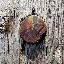

In [35]:
test_img

In [6]:
import random

In [9]:
random.choice([0,3])

3